<a href="https://colab.research.google.com/github/chhendley/chhendley_python_projects/blob/main/radius_fracture_predictor_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras import callbacks
import matplotlib.pyplot as plt
import warnings
# filter warnings
warnings.filterwarnings('ignore')
import os
import scipy
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
from PIL import Image as img
import random
seed_value = 42  # Set random seed
random.seed(seed_value)
import tensorflow_hub as hub

In [ ]:
train_path='/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set'
val_path='/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/val'

In [ ]:
import os
import shutil

# Define paths
validation_dir = '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/val'
validate_dir = '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate'
test_dir = '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test'

# Create validate and test directories
os.makedirs(validate_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Loop through class folders within the validation directory
for dirname, _, filenames in os.walk(validation_dir):
    # Get the class name from the current directory name
    class_name = os.path.basename(dirname)

    # Create class subdirectories in validate and test folders
    class_validate_dir = os.path.join(validate_dir, class_name)
    class_test_dir = os.path.join(test_dir, class_name)
    os.makedirs(class_validate_dir, exist_ok=True)
    os.makedirs(class_test_dir, exist_ok=True)

    # Determine number of images for validation and test
    num_images = len(filenames)
    num_validate = int(0.7 * num_images)  # 70% for validation
    num_test = num_images - num_validate

    for filename in filenames:
        source_path = os.path.join(dirname, filename)
        destination_dir = class_validate_dir if num_validate > 0 else class_test_dir
        destination_path = os.path.join(destination_dir, filename)
        shutil.move(source_path, destination_path)
        num_validate -= 1 if num_validate > 0 else 0



In [ ]:
import os
#set folder paths

folder_path = "/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/val"

try:
    os.rmdir(folder_path)
    print(f"Folder '{folder_path}' has been deleted successfully.")
except OSError as e:
    print(f"Error deleting folder '{folder_path}': {e}")

folder_path = "/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/val"

try:
    os.rmdir(folder_path)
    print(f"Folder '{folder_path}' has been deleted successfully.")
except OSError as e:
    print(f"Error deleting folder '{folder_path}': {e}")


Folder '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/val' has been deleted successfully.
Folder '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/val' has been deleted successfully.


In [ ]:
#attached lables to images
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/2-rotated2-rotated1-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/9-rotated1-rotated1-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/1-rotated2-rotated1-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/4-rotated1-rotated2-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/3-rotated3-rotated3-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/7-rotated2-rotated1-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/4-rotated1-rotated1-rotated1.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/1-rotated2-rotated1.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate/fractured/1-rotated2-rotated2-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/v

In [ ]:
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/1-rotated2-rotated1-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/3-rotated2-rotated3-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/7-rotated1-rotated1-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/8-rotated2-rotated3-rotated1.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/8-rotated2-rotated2-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/8-rotated3-rotated3-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/7-rotated2-rotated2-rotated1.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/8-rotated2-rotated2-rotated1.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/8-rotated3-rotated3-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test/fractured/5-rotated2-ro

In [ ]:
for dirname, _, filenames in os.walk('/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Streaming output truncated to the last 5000 lines.
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/14-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/15-rotated2-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/17-rotated1-rotated3-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/15-rotated2-rotated2-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/21-rotated1-rotated3-rotated1.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/35-rotated3-rotated3-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/33-rotated3-rotated3-rotated3.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/26-rotated3-rotated3-rotated2.jpg
/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fra

In [ ]:
#download the pretrained models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from glob import glob
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, Input,GlobalAveragePooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import DenseNet169
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception

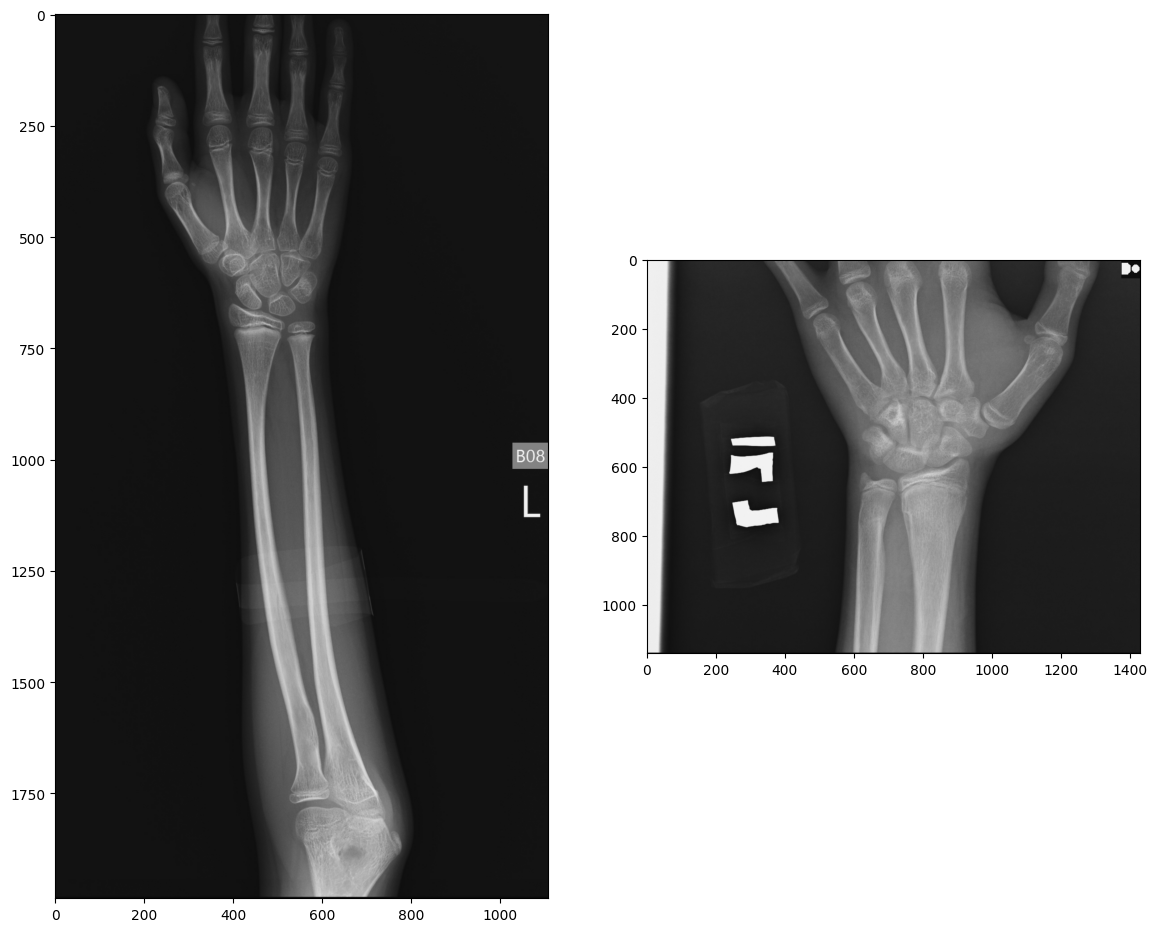

In [ ]:
#/content/gdrive/MyDrive/Colab_Notebooks/Mri_scan_folder/Testing/glioma/Te-gl_0117.jpg
img=[load_img('/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/not fractured/23.jpg'),
load_img('/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set/fractured/100.jpg')]

plt.figure(figsize=(14,14))
x, y = 1, 2
for i in range(2):
    plt.subplot(x, y, i+1)
    plt.imshow(img[i], cmap='gray')
plt.show()

In [ ]:
for i in range(2):
    x=img_to_array(img[i])
    print(x.shape)

(1986, 1108, 3)
(1140, 1430, 3)


In [ ]:
#data generator
test_path = '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/test'
validate_path = '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/validate'

batch_size=16
#Data Generation -Train-validate
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.3,
                                horizontal_flip=True,
                                zoom_range=0.3)

test_datagen=ImageDataGenerator(rescale=1./255)
val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
        train_path,
        target_size=(224,224),
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb")

validation_generator = val_datagen.flow_from_directory(
    validate_path,
    target_size=(224,224),
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="rgb"
)

test_generator=train_datagen.flow_from_directory(
        test_path,
        target_size=(224,224),
        batch_size=batch_size,
        class_mode="categorical",
        color_mode="rgb")

Found 8873 images belonging to 2 classes.
Found 419 images belonging to 2 classes.
Found 181 images belonging to 2 classes.


In [ ]:
#find number of classes
className=glob(train_path+"/*")
numberOfClass=len(className)
print("train number of class:",numberOfClass)
class_indices = train_generator.class_indices
unique_labels = list(class_indices.keys())
print("Train unique Labels:", unique_labels)
# Get the class indices
class_indices = train_generator.class_indices

# Get the class names from the dictionary
class_names = list(class_indices.keys())
print("train class Names:", class_names)

#find number of classes
className=glob(validate_path+"/*")
numberOfClass=len(className)
print("val number of class:",numberOfClass)
class_indices = train_generator.class_indices
unique_labels = list(class_indices.keys())
print("Val unique Labels:", unique_labels)
# Get the class indices
class_indices = train_generator.class_indices
# Get the class names from the dictionary
class_names = list(class_indices.keys())
print("val Class Names:", class_names)



#find number of classes
className=glob(test_path+"/*")
numberOfClass=len(className)
print("test number of class:",numberOfClass)
class_indices = train_generator.class_indices
unique_labels = list(class_indices.keys())
print("Test unique Labels:", unique_labels)

train number of class: 2
Train unique Labels: ['fractured', 'not fractured']
train class Names: ['fractured', 'not fractured']
val number of class: 2
Val unique Labels: ['fractured', 'not fractured']
val Class Names: ['fractured', 'not fractured']
test number of class: 2
Test unique Labels: ['fractured', 'not fractured']


In [ ]:
print('train shape ',train_generator.next()[0].shape)
print('validation shape ', validation_generator.next()[0].shape)
print('test shape ', test_generator.next()[0].shape)

train shape  (16, 224, 224, 3)
validation shape  (16, 224, 224, 3)
test shape  (16, 224, 224, 3)


Found 8873 images belonging to 2 classes.


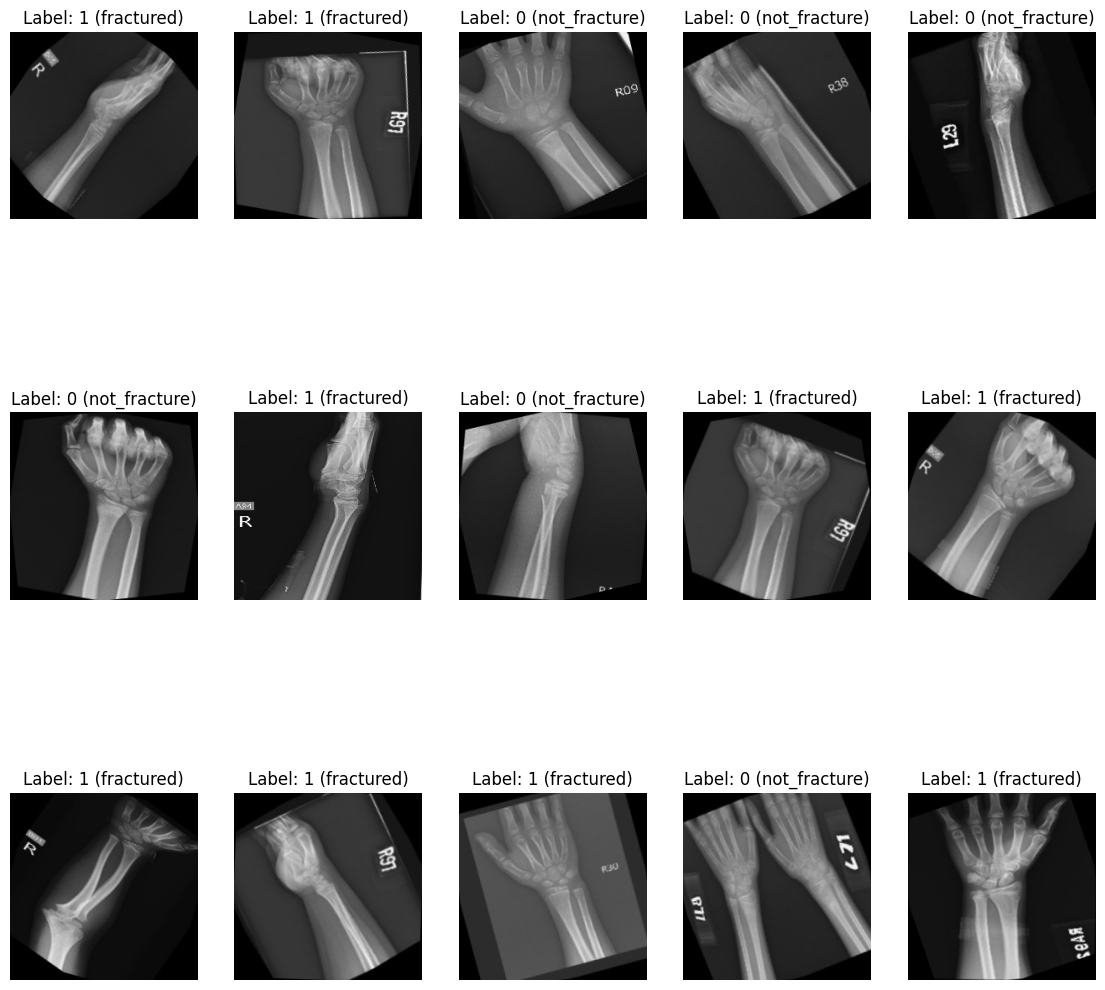

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define class names
class_names = ['not_fracture', 'fractured']

# Set batch size
batch_size = 15

# Create data generator for training data
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="rgb",
    shuffle=True
)

# Get a batch of images and labels
batch_1_img, batch_1_labels = next(train_generator)

# Display images with labels
plt.figure(figsize=(14, 14))
x, y = 3, 5

for i in range(batch_size):
    img = batch_1_img[i]
    lab_idx = np.argmax(batch_1_labels[i])  # Get the class index
    lab_name = class_names[lab_idx]  # Get the corresponding class name
    plt.subplot(x, y, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {lab_idx} ({lab_name})")
    plt.axis("off")

plt.show()


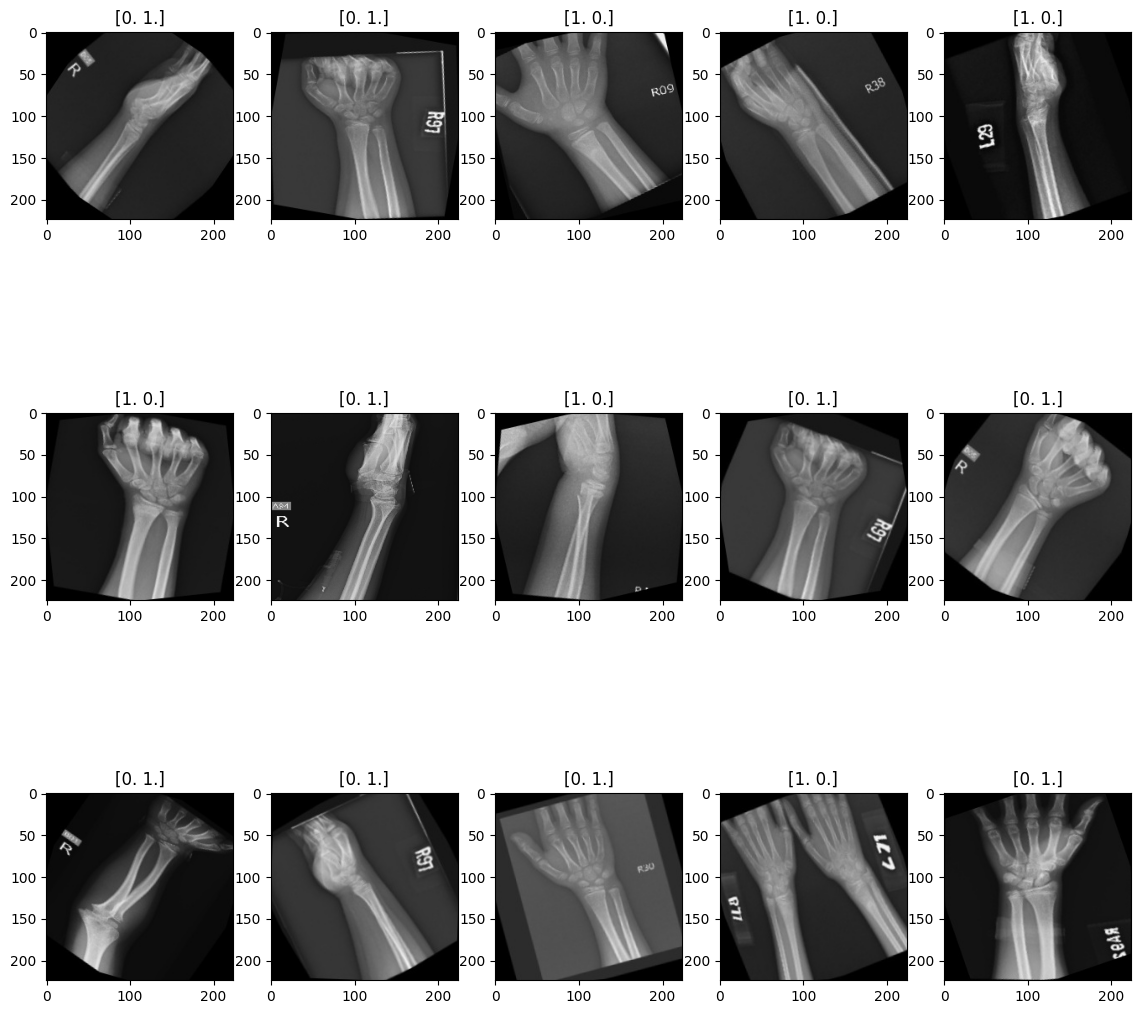

In [ ]:
batch_1_img = train_generator[0]
plt.figure(figsize=(14,14))
x, y = 3, 5
for i in range(15):
    img = batch_1_img[0][i]
    lab = batch_1_img[1][i]
    plt.subplot(x, y, i+1)
    plt.imshow(img)
    plt.title(lab)
plt.show()

In [ ]:
generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2
)

In [ ]:
Train_generator = generator.flow_from_directory(
    '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/train_full_set',
    target_size = (224, 224),
    batch_size = 16,
    class_mode ="binary",
    subset = "training"
)

Validation_generator = generator.flow_from_directory(
    '/content/gdrive/MyDrive/Colab_Notebooks/fracture_data/val',
    target_size = (224, 224),
    batch_size = 16,
    class_mode ="binary",
    subset = "validation"
)

Found 7099 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
Train_generator.next()[0].shape

(16, 224, 224, 3)

In [ ]:
Validation_generator.next()[0].shape

(0, 224, 224, 3)

<a id="1"></a><br>
# Xception

In [ ]:
xception = Xception(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in xception.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(xception.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=xception.input, outputs=out)



83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 1148s 7s/step - loss: 0.5771 - accuracy: 0.7035 - val_loss: 0.5228 - val_accuracy: 0.7270
Epoch 2/40
172/172 [==============================] - 705s 4s/step - loss: 0.4725 - accuracy: 0.7862 - val_loss: 0.5032 - val_accuracy: 0.7862
Epoch 3/40
172/172 [==============================] - 475s 3s/step - loss: 0.4183 - accuracy: 0.8233 - val_loss: 0.5056 - val_accuracy: 0.7303
Epoch 4/40
172/172 [==============================] - 354s 2s/step - loss: 0.3886 - accuracy: 0.8349 - val_loss: 0.5523 - val_accuracy: 0.7204
Epoch 5/40
172/172 [==============================] - 231s 1s/step - loss: 0.3792 - accuracy: 0.8442 - val_loss: 0.5171 - val_accuracy: 0.7368
Epoch 6/40
172/172 [==============================] - 183s 1s/step - loss: 0.3562 - accuracy: 0.8566 - val_loss: 0.5314 - val_accuracy: 0.7401
Epoch 7/40
172/172 [==============================] - 132s 767ms/step - loss: 0.3461 - accuracy: 0.8647 - val_loss: 0.5149 - val_accuracy: 0.

In [ ]:
loss_xcep, accuracy_xcep = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_xcep)
print("Test Accuracy:", accuracy_xcep)

1/1 [==============================] - 0s 351ms/step - loss: 0.4547 - accuracy: 0.6875
Test Loss: 0.4546873867511749
Test Accuracy: 0.6875


<a id="1"></a><br>
# VGG16

In [ ]:
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in vgg16.layers:
    layer.trainable = False

x = Flatten()(vgg16.output)
out = Dense(2, activation='sigmoid')(x)

# Yeni modeli oluşturun
model = Model(inputs=vgg16.input, outputs=out)
model.summary()

58889256/58889256 [==============================] - 3s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])


In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 21s 100ms/step - loss: 0.4950 - accuracy: 0.7543 - val_loss: 0.7359 - val_accuracy: 0.5888
Epoch 2/40
172/172 [==============================] - 14s 82ms/step - loss: 0.2495 - accuracy: 0.9225 - val_loss: 0.7534 - val_accuracy: 0.6250
Epoch 3/40
172/172 [==============================] - 15s 87ms/step - loss: 0.1709 - accuracy: 0.9566 - val_loss: 0.9460 - val_accuracy: 0.5329
Epoch 4/40
172/172 [==============================] - 15s 86ms/step - loss: 0.1155 - accuracy: 0.9798 - val_loss: 0.7610 - val_accuracy: 0.6809
Epoch 5/40
172/172 [==============================] - 17s 101ms/step - loss: 0.1007 - accuracy: 0.9786 - val_loss: 0.7763 - val_accuracy: 0.7105
Epoch 6/40
172/172 [==============================] - 16s 89ms/step - loss: 0.0843 - accuracy: 0.9848 - val_loss: 0.7847 - val_accuracy: 0.6711
Epoch 7/40
172/172 [==============================] - 15s 87ms/step - loss: 0.0568 - accuracy: 0.9946 - val_loss: 0.7978 - val_accurac

In [ ]:
loss16, accuracy16 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss16)
print("Test Accuracy:", accuracy16)

1/1 [==============================] - 0s 363ms/step - loss: 1.1147 - accuracy: 0.6250
Test Loss: 1.1146602630615234
Test Accuracy: 0.625


<a id="2"></a><br>
# VGG19

In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in vgg19.layers:
    layer.trainable = False

x = Flatten()(vgg19.output)
out = Dense(2, activation='sigmoid')(x)

# Yeni modeli oluşturun
model = Model(inputs=vgg19.input, outputs=out)



80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]


model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 18s 94ms/step - loss: 0.5331 - accuracy: 0.7419 - val_loss: 0.9194 - val_accuracy: 0.5329
Epoch 2/40
172/172 [==============================] - 17s 98ms/step - loss: 0.3344 - accuracy: 0.8543 - val_loss: 0.9268 - val_accuracy: 0.5164
Epoch 3/40
172/172 [==============================] - 17s 99ms/step - loss: 0.2176 - accuracy: 0.9345 - val_loss: 0.7101 - val_accuracy: 0.6283
Epoch 4/40
172/172 [==============================] - 16s 91ms/step - loss: 0.1643 - accuracy: 0.9624 - val_loss: 0.8324 - val_accuracy: 0.5724
Epoch 5/40
172/172 [==============================] - 16s 90ms/step - loss: 0.1219 - accuracy: 0.9833 - val_loss: 0.7801 - val_accuracy: 0.5757
Epoch 6/40
172/172 [==============================] - 16s 93ms/step - loss: 0.1055 - accuracy: 0.9795 - val_loss: 0.8560 - val_accuracy: 0.5428
Epoch 7/40
172/172 [==============================] - 17s 96ms/step - loss: 0.0834 - accuracy: 0.9899 - val_loss: 0.9154 - val_accuracy:

In [ ]:
loss19, accuracy19 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss19)
print("Test Accuracy:", accuracy19)

1/1 [==============================] - 0s 367ms/step - loss: 1.6230 - accuracy: 0.4375
Test Loss: 1.6230480670928955
Test Accuracy: 0.4375


<a id="3"></a><br>
# MobileNet

In [ ]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in mobilenet.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(mobilenet.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=mobilenet.input, outputs=out)



17225924/17225924 [==============================] - 2s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 16s 79ms/step - loss: 0.5901 - accuracy: 0.6906 - val_loss: 0.5141 - val_accuracy: 0.7697
Epoch 2/40
172/172 [==============================] - 12s 68ms/step - loss: 0.4460 - accuracy: 0.8163 - val_loss: 0.4618 - val_accuracy: 0.7664
Epoch 3/40
172/172 [==============================] - 12s 68ms/step - loss: 0.3858 - accuracy: 0.8539 - val_loss: 0.4779 - val_accuracy: 0.7566
Epoch 4/40
172/172 [==============================] - 11s 66ms/step - loss: 0.3430 - accuracy: 0.8741 - val_loss: 0.4442 - val_accuracy: 0.7763
Epoch 5/40
172/172 [==============================] - 12s 70ms/step - loss: 0.3088 - accuracy: 0.8919 - val_loss: 0.4727 - val_accuracy: 0.7895
Epoch 6/40
172/172 [==============================] - 12s 68ms/step - loss: 0.2798 - accuracy: 0.9089 - val_loss: 0.4638 - val_accuracy: 0.7566
Epoch 7/40
172/172 [==============================] - 13s 75ms/step - loss: 0.2605 - accuracy: 0.9205 - val_loss: 0.4642 - val_accuracy:

In [ ]:
loss_mob, accuracy_mob = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_mob)
print("Test Accuracy:", accuracy_mob)

1/1 [==============================] - 0s 283ms/step - loss: 1.2804 - accuracy: 0.5000
Test Loss: 1.280350685119629
Test Accuracy: 0.5


<a id="4"></a><br>
# MobileNetV2

In [ ]:

mobilenetv2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in mobilenetv2.layers:
    layer.trainable = False
x = GlobalAveragePooling2D()(mobilenetv2.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=mobilenetv2.input, outputs=out)


9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 18s 82ms/step - loss: 0.5285 - accuracy: 0.7310 - val_loss: 0.5399 - val_accuracy: 0.7829
Epoch 2/40
172/172 [==============================] - 12s 72ms/step - loss: 0.3753 - accuracy: 0.8457 - val_loss: 0.5924 - val_accuracy: 0.6579
Epoch 3/40
172/172 [==============================] - 12s 68ms/step - loss: 0.3225 - accuracy: 0.8787 - val_loss: 0.4719 - val_accuracy: 0.7434
Epoch 4/40
172/172 [==============================] - 12s 70ms/step - loss: 0.2857 - accuracy: 0.8982 - val_loss: 0.5038 - val_accuracy: 0.7368
Epoch 5/40
172/172 [==============================] - 12s 72ms/step - loss: 0.2544 - accuracy: 0.9140 - val_loss: 0.4343 - val_accuracy: 0.7895
Epoch 6/40
172/172 [==============================] - 12s 72ms/step - loss: 0.2377 - accuracy: 0.9203 - val_loss: 0.4873 - val_accuracy: 0.7566
Epoch 7/40
172/172 [==============================] - 11s 64ms/step - loss: 0.2233 - accuracy: 0.9269 - val_loss: 0.4619 - val_accuracy:

In [ ]:
loss_mobv2, accuracy_mobv2 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_mobv2)
print("Test Accuracy:", accuracy_mobv2)

1/1 [==============================] - 0s 299ms/step - loss: 1.0243 - accuracy: 0.6875
Test Loss: 1.024287462234497
Test Accuracy: 0.6875


<a id="5"></a><br>
# ResNet50

In [ ]:
resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in resnet50.layers:
    layer.trainable = False
x = Flatten()(resnet50.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=resnet50.input, outputs=out)


94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 21s 91ms/step - loss: 1.4035 - accuracy: 0.5740 - val_loss: 1.6555 - val_accuracy: 0.5987
Epoch 2/40
172/172 [==============================] - 14s 78ms/step - loss: 0.7944 - accuracy: 0.6357 - val_loss: 0.7209 - val_accuracy: 0.6546
Epoch 3/40
172/172 [==============================] - 16s 91ms/step - loss: 0.7698 - accuracy: 0.6455 - val_loss: 0.7873 - val_accuracy: 0.5296
Epoch 4/40
172/172 [==============================] - 13s 76ms/step - loss: 0.9113 - accuracy: 0.6364 - val_loss: 0.8718 - val_accuracy: 0.6184
Epoch 5/40
172/172 [==============================] - 15s 84ms/step - loss: 0.5891 - accuracy: 0.7426 - val_loss: 0.8779 - val_accuracy: 0.5855
Epoch 6/40
172/172 [==============================] - 13s 78ms/step - loss: 0.8739 - accuracy: 0.6725 - val_loss: 0.7638 - val_accuracy: 0.5921
Epoch 7/40
172/172 [==============================] - 15s 85ms/step - loss: 0.5873 - accuracy: 0.7295 - val_loss: 0.8128 - val_accuracy:

In [ ]:
loss_res50, accuracy_res50 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_res50)
print("Test Accuracy:", accuracy_res50)

1/1 [==============================] - 0s 336ms/step - loss: 1.5687 - accuracy: 0.5000
Test Loss: 1.5687013864517212
Test Accuracy: 0.5


<a id="6"></a><br>
# ResNet101

In [ ]:
resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in resnet101.layers:
    layer.trainable = False
x = Flatten()(resnet101.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=resnet101.input, outputs=out)



171446536/171446536 [==============================] - 10s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 28s 127ms/step - loss: 1.1432 - accuracy: 0.5690 - val_loss: 1.3312 - val_accuracy: 0.4868
Epoch 2/40
172/172 [==============================] - 19s 112ms/step - loss: 0.6623 - accuracy: 0.6682 - val_loss: 0.8126 - val_accuracy: 0.5888
Epoch 3/40
172/172 [==============================] - 19s 113ms/step - loss: 0.6970 - accuracy: 0.6705 - val_loss: 1.0701 - val_accuracy: 0.5559
Epoch 4/40
172/172 [==============================] - 19s 113ms/step - loss: 0.7498 - accuracy: 0.6837 - val_loss: 1.0760 - val_accuracy: 0.5461
Epoch 5/40
172/172 [==============================] - 19s 112ms/step - loss: 0.5753 - accuracy: 0.7357 - val_loss: 1.2985 - val_accuracy: 0.5329
Epoch 6/40
172/172 [==============================] - 20s 113ms/step - loss: 0.5601 - accuracy: 0.7411 - val_loss: 0.9169 - val_accuracy: 0.5789
Epoch 7/40
172/172 [==============================] - 20s 113ms/step - loss: 0.4981 - accuracy: 0.7736 - val_loss: 1.6664 - val_ac

In [ ]:
loss_res101, accuracy_res101 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_res101)
print("Test Accuracy:", accuracy_res101)

1/1 [==============================] - 0s 385ms/step - loss: 1.3150 - accuracy: 0.3750
Test Loss: 1.3150384426116943
Test Accuracy: 0.375


<a id="7"></a><br>
# DenseNet169

In [ ]:
densenet169 = DenseNet169(weights='imagenet', include_top=False, input_shape=(224,224, 3))


for layer in densenet169.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(densenet169.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=densenet169.input, outputs=out)


51877672/51877672 [==============================] - 4s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 36s 135ms/step - loss: 0.5892 - accuracy: 0.6887 - val_loss: 0.4132 - val_accuracy: 0.8158
Epoch 2/40
172/172 [==============================] - 15s 89ms/step - loss: 0.4055 - accuracy: 0.8294 - val_loss: 0.4118 - val_accuracy: 0.8289
Epoch 3/40
172/172 [==============================] - 14s 83ms/step - loss: 0.3598 - accuracy: 0.8496 - val_loss: 0.4501 - val_accuracy: 0.7763
Epoch 4/40
172/172 [==============================] - 16s 90ms/step - loss: 0.3156 - accuracy: 0.8787 - val_loss: 0.3933 - val_accuracy: 0.8191
Epoch 5/40
172/172 [==============================] - 15s 89ms/step - loss: 0.2781 - accuracy: 0.9035 - val_loss: 0.3797 - val_accuracy: 0.8289
Epoch 6/40
172/172 [==============================] - 14s 83ms/step - loss: 0.2617 - accuracy: 0.9067 - val_loss: 0.3676 - val_accuracy: 0.8388
Epoch 7/40
172/172 [==============================] - 14s 83ms/step - loss: 0.2378 - accuracy: 0.9234 - val_loss: 0.4225 - val_accuracy

In [ ]:
loss_den169, accuracy_den169 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_den169)
print("Test Accuracy:", accuracy_den169)

1/1 [==============================] - 0s 347ms/step - loss: 0.6990 - accuracy: 0.7500
Test Loss: 0.6990290880203247
Test Accuracy: 0.75


<a id="8"></a><br>
# DenseNet121

In [ ]:
densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224,224, 3))


for layer in densenet121.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(densenet121.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=densenet121.input, outputs=out)

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 24s 98ms/step - loss: 0.6290 - accuracy: 0.6335 - val_loss: 0.5331 - val_accuracy: 0.7039
Epoch 2/40
172/172 [==============================] - 13s 75ms/step - loss: 0.4819 - accuracy: 0.7775 - val_loss: 0.4794 - val_accuracy: 0.7599
Epoch 3/40
172/172 [==============================] - 13s 78ms/step - loss: 0.4246 - accuracy: 0.8109 - val_loss: 0.5016 - val_accuracy: 0.7368
Epoch 4/40
172/172 [==============================] - 14s 80ms/step - loss: 0.3962 - accuracy: 0.8264 - val_loss: 0.4603 - val_accuracy: 0.7599
Epoch 5/40
172/172 [==============================] - 13s 74ms/step - loss: 0.3710 - accuracy: 0.8453 - val_loss: 0.5344 - val_accuracy: 0.6776
Epoch 6/40
172/172 [==============================] - 14s 83ms/step - loss: 0.3408 - accuracy: 0.8667 - val_loss: 0.5511 - val_accuracy: 0.6809
Epoch 7/40
172/172 [==============================] - 13s 74ms/step - loss: 0.3077 - accuracy: 0.8861 - val_loss: 0.5323 - val_accuracy:

In [ ]:
loss_den121, accuracy_den121 = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_den121)
print("Test Accuracy:", accuracy_den121)

1/1 [==============================] - 1s 518ms/step - loss: 0.4456 - accuracy: 0.8125
Test Loss: 0.4456446170806885
Test Accuracy: 0.8125


<a id="9"></a><br>
# InceptionV3

In [ ]:
inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224, 3))

for layer in inceptionv3.layers:
    layer.trainable = False

x = GlobalAveragePooling2D()(inceptionv3.output)
out = Dense(2, activation='sigmoid')(x)

model = Model(inputs=inceptionv3.input, outputs=out)

87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
callbacks=[EarlyStopping(monitor='val_loss',patience=10)]

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,steps_per_epoch=2581// batch_size,validation_data=validation_generator,epochs=40,validation_steps=289// batch_size,callbacks=callbacks)

Epoch 1/40
172/172 [==============================] - 25s 104ms/step - loss: 0.5722 - accuracy: 0.7058 - val_loss: 0.6355 - val_accuracy: 0.6382
Epoch 2/40
172/172 [==============================] - 14s 79ms/step - loss: 0.3967 - accuracy: 0.8236 - val_loss: 0.6569 - val_accuracy: 0.6513
Epoch 3/40
172/172 [==============================] - 13s 77ms/step - loss: 0.3698 - accuracy: 0.8295 - val_loss: 0.5302 - val_accuracy: 0.6908
Epoch 4/40
172/172 [==============================] - 12s 72ms/step - loss: 0.3067 - accuracy: 0.8686 - val_loss: 0.7836 - val_accuracy: 0.6546
Epoch 5/40
172/172 [==============================] - 12s 72ms/step - loss: 0.2944 - accuracy: 0.8760 - val_loss: 0.5353 - val_accuracy: 0.7204
Epoch 6/40
172/172 [==============================] - 13s 78ms/step - loss: 0.2852 - accuracy: 0.8795 - val_loss: 0.5199 - val_accuracy: 0.7336
Epoch 7/40
172/172 [==============================] - 12s 71ms/step - loss: 0.2558 - accuracy: 0.8955 - val_loss: 0.5640 - val_accuracy

In [ ]:
loss_incep, accuracy_incep = model.evaluate(test_generator, steps=test_generator.samples // 128)
print("Test Loss:", loss_incep)
print("Test Accuracy:", accuracy_incep)

1/1 [==============================] - 0s 330ms/step - loss: 0.8931 - accuracy: 0.6250
Test Loss: 0.8930760622024536
Test Accuracy: 0.625


<a id="10"></a><br>
# Model Comparison

         Model      Loss  Accuracy
0        VGG16  1.114660    0.6250
1        VGG19  1.623048    0.4375
2     MobilNet  1.280351    0.5000
3   MobilNetV2  1.024287    0.6875
4     ResNet50  1.568701    0.5000
5    ResNet101  1.315038    0.3750
6  DenseNet169  0.699029    0.7500
7  DenseNet121  0.445645    0.8125
8  InceptionV3  0.893076    0.6250


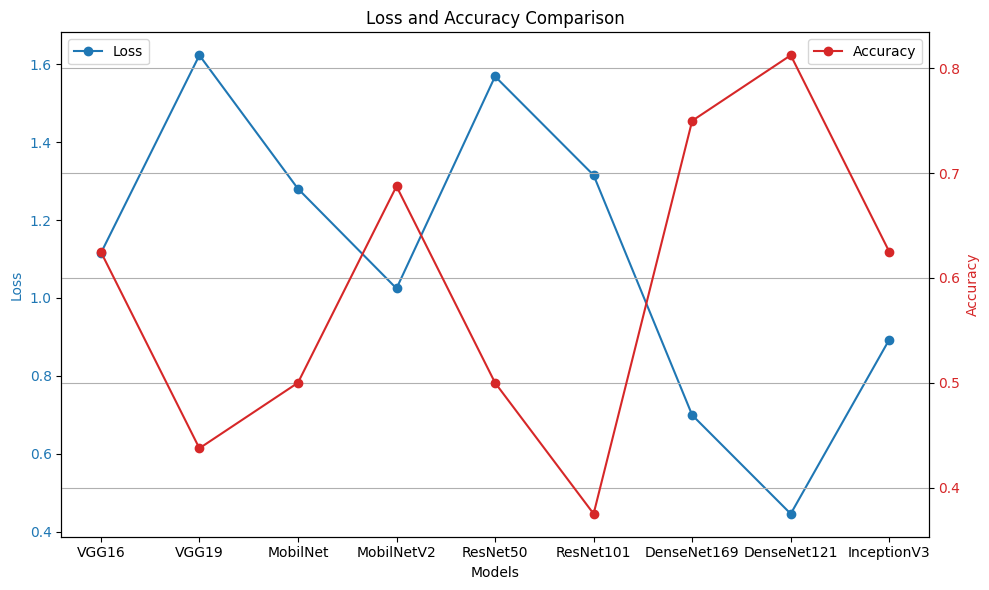

In [ ]:

models = ['Xception','VGG16', 'VGG19', 'MobilNet', 'MobilNetV2', 'ResNet50', 'ResNet101', 'DenseNet169', 'DenseNet121', 'InceptionV3']
loss_values = [loss_xcep, loss16, loss19, loss_mob, loss_mobv2, loss_res50, loss_res101, loss_den169,loss_den121,loss_incep]
accuracy_values = [accuracy_xcep, accuracy16, accuracy19, accuracy_mob, accuracy_mobv2, accuracy_res50, accuracy_res101, accuracy_den169, accuracy_den121, accuracy_incep]

data = {'Model': models, 'Loss': loss_values, 'Accuracy': accuracy_values}
df = pd.DataFrame(data)

print(df)


fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Models')
ax1.set_ylabel('Loss', color=color)
ax1.plot(models, loss_values, marker='o', color=color, label='Loss')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(models, accuracy_values, marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

plt.title('Loss and Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()